Loaded processed data: tsla_20250823-222146.parquet
Data shape: (126, 19)
=== OUTLIER ANALYSIS RESULTS ===
Total rows: 126
IQR outliers: 4 (3.2%)
Z-score outliers: 3 (2.4%)

=== SUMMARY STATISTICS COMPARISON ===
                 all  filtered_iqr  winsorized
mean    1.065814e-17     -0.007709   -0.004689
median -2.485829e-02     -0.024858   -0.024858
std     1.004024e+00      0.794667    0.770326
min    -3.295109e+00     -2.234872   -1.421847
max     4.776968e+00      2.047838    1.377964

=== SKEWNESS AND KURTOSIS ===
          all  filtered_iqr  winsorized
skewness  NaN           NaN         NaN
kurtosis  NaN           NaN         NaN


C:\Users\박서아\AppData\Local\Temp\ipykernel_5192\2491911293.py:45: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[target_col].dropna(),


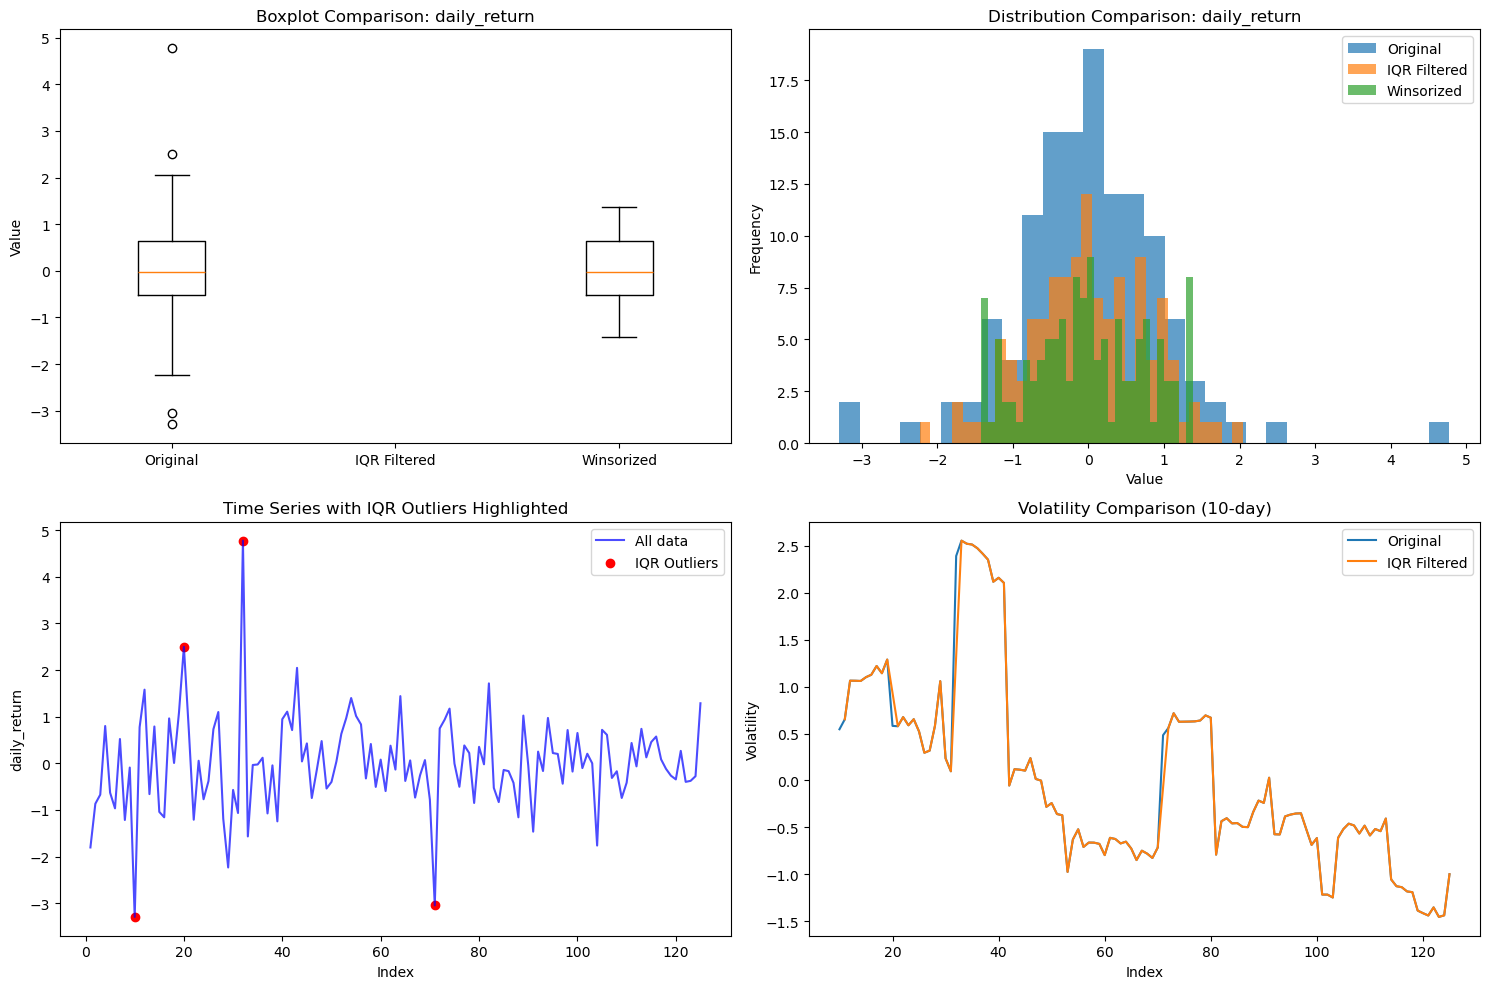


=== OUTLIER ANALYSIS COMPLETED ===


In [9]:
# Sensitivity Analysis: Outlier Impact on Stock Prediction Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# Add src to path
sys.path.append('../src')

# Import outlier functions
from outliers import detect_outliers_iqr, detect_outliers_zscore, winsorize_series, analyze_outliers_impact

# Load processed data
processed_dir = Path('C:/Users/박서아/bootcamp_andrew_song/project/data/processed')
latest_file = max(processed_dir.glob('*.parquet'), key=lambda x: x.stat().st_mtime)
df = pd.read_parquet(latest_file)

print(f"Loaded processed data: {latest_file.name}")
print(f"Data shape: {df.shape}")

# Set target column (daily returns for outlier analysis)
target_col = 'daily_return'

# Analyze outliers impact
results = analyze_outliers_impact(df, target_col)

print("=== OUTLIER ANALYSIS RESULTS ===")
print(f"Total rows: {results['outlier_counts']['total_rows']}")
print(f"IQR outliers: {results['outlier_counts']['iqr']} ({results['outlier_counts']['iqr']/results['outlier_counts']['total_rows']*100:.1f}%)")
print(f"Z-score outliers: {results['outlier_counts']['z_score']} ({results['outlier_counts']['z_score']/results['outlier_counts']['total_rows']*100:.1f}%)")

print("\n=== SUMMARY STATISTICS COMPARISON ===")
print(results['summary_stats'])

print("\n=== SKEWNESS AND KURTOSIS ===")
print(results['skew_kurtosis'])

# Visual comparison
plt.figure(figsize=(15, 10))

# Boxplot comparison
plt.subplot(2, 2, 1)
plt.boxplot([df[target_col].dropna(), 
             df.loc[~results['iqr_outliers_mask'], target_col], 
             results['winsorized_data'].dropna()], 
            labels=['Original', 'IQR Filtered', 'Winsorized'])
plt.title(f'Boxplot Comparison: {target_col}')
plt.ylabel('Value')

# Histogram comparison
plt.subplot(2, 2, 2)
plt.hist(df[target_col].dropna(), bins=30, alpha=0.7, label='Original')
plt.hist(df.loc[~results['iqr_outliers_mask'], target_col], bins=30, alpha=0.7, label='IQR Filtered')
plt.hist(results['winsorized_data'].dropna(), bins=30, alpha=0.7, label='Winsorized')
plt.title(f'Distribution Comparison: {target_col}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Time series with outliers highlighted
plt.subplot(2, 2, 3)
plt.plot(df.index, df[target_col], 'b-', alpha=0.7, label='All data')
outliers_iqr = df[results['iqr_outliers_mask']]
plt.scatter(outliers_iqr.index, outliers_iqr[target_col], color='red', label='IQR Outliers')
plt.title('Time Series with IQR Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel(target_col)
plt.legend()

# Volatility comparison (if available)
if 'volatility_10' in df.columns:
    plt.subplot(2, 2, 4)
    plt.plot(df.index, df['volatility_10'], label='Original')
    df_filtered = df.loc[~results['iqr_outliers_mask']]
    plt.plot(df_filtered.index, df_filtered['volatility_10'], label='IQR Filtered')
    plt.title('Volatility Comparison (10-day)')
    plt.xlabel('Index')
    plt.ylabel('Volatility')
    plt.legend()

plt.tight_layout()
plt.savefig('../docs/outlier_analysis_visualization.png')
plt.show()

print("\n=== OUTLIER ANALYSIS COMPLETED ===")